# Dataset Regresión Lineal – Titanic dataset:

El objetivo es predecir quién sobrevivió al naufragio de los pasajeros del Titanic. Permite practicar 
modelos de clasificación y regresión [referencia](https://www.kaggle.com/datasets/yasserh/titanic-dataseto)

### Paso 1: Realizar un an&aacute;lisis exploratorio de los datos para identificar relaciones entre variables, valores at&iacute;picos, tendencias, etc.

In [3]:
#Importar librerias para trabajar

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [5]:
#Cargar datos

In [6]:
Data = pd.read_csv('D:/UNAD/Semestre 4/1. ANÁLISIS DE DATOS (202016908_8)/Actividad 5/Anexo 6 - Dataset Titanic/Titanic-Dataset.csv')

In [7]:
#Mostrar en pantalla los datos para hacer el análsisis exploratorio

In [8]:
Data.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
#Descripción de los datos

In [10]:
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Paso 2: Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario 

In [12]:
#Tratar con los valores faltantes.
Data.replace(0, np.nan, inplace=True)
Data.fillna(Data.mean(numeric_only=True), inplace=True)
Data.fillna('NA', inplace=True)

In [13]:
#Motrar en pantalla los datos

In [14]:
Data.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1.0,3,"Braund, Mr. Owen Harris",male,22.000000,1.000000,1.596244,A/5 21171,7.2500,NA,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1.000000,1.596244,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,1.646643,1.596244,STON/O2. 3101282,7.9250,NA,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1.000000,1.596244,113803,53.1000,C123,S
4,5,1.0,3,"Allen, Mr. William Henry",male,35.000000,1.646643,1.596244,373450,8.0500,NA,S
5,6,1.0,3,"Moran, Mr. James",male,29.699118,1.646643,1.596244,330877,8.4583,NA,Q
6,7,1.0,1,"McCarthy, Mr. Timothy J",male,54.000000,1.646643,1.596244,17463,51.8625,E46,S
7,8,1.0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3.000000,1.000000,349909,21.0750,NA,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,1.646643,2.000000,347742,11.1333,NA,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1.000000,1.596244,237736,30.0708,NA,C


In [15]:
#Confirmar columnas

In [16]:
print(Data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [19]:
#Análisis exploratorio de datos mediante las variables objetivos (Survived, Pclass, Sex, Age, SibSp, Parch)

<Axes: xlabel='Parch'>

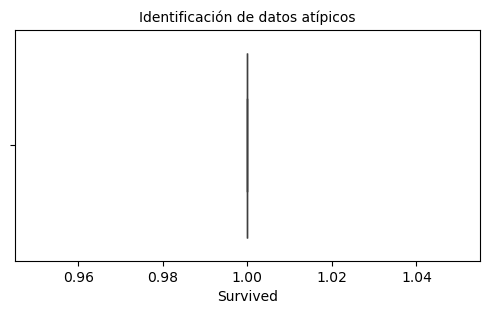

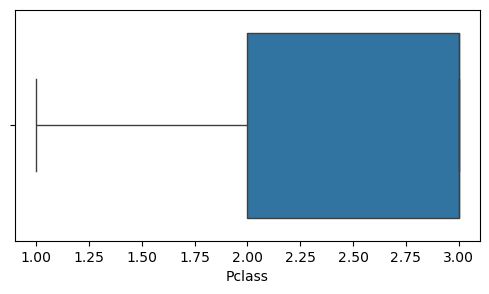

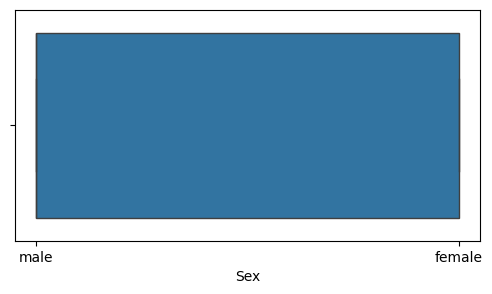

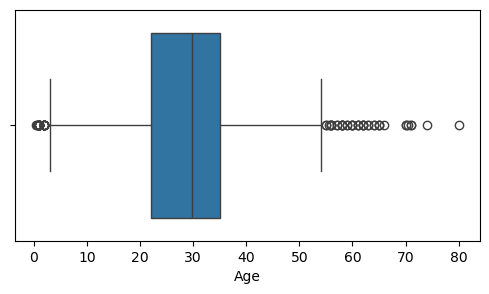

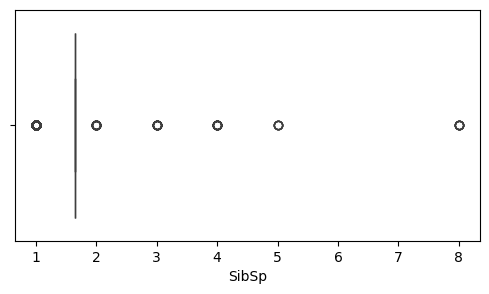

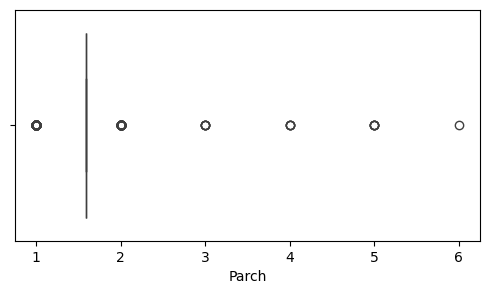

In [21]:
# Variable "Survived"
plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['Survived'])
plt.title('Identificación de datos atípicos', fontsize=10)

# Variable "Pclass"
plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['Pclass'])

# Variable "Sex"
plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['Sex'])

# Variable "Age"
plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['Age'])

# Variable "SibSp"
plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['SibSp'])

# Variable "Parch"
plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['Parch'])

In [ ]:
#Límites para los datos atípicos

In [25]:
max_age = 70
min_age = 1
total_age = ((Data['Age'] < min_age) | (Data['Age'] > max_age)).sum()

max_class = 3
min_class = 1
total_class = ((Data['Pclass'] < min_class) | (Data['Pclass'] > max_class)).sum()

print("Total registros dataset: {}".format(len(Data)))
print("El total de datos atípicos para las edades es {}".format(total_age))
print("El total de datos atípicos para la clase es {}".format(total_class))
print("")
Data.info()

Total registros dataset: 891
El total de datos atípicos para las edades es 12
El total de datos atípicos para la clase es 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    float64
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(5), int64(2), object(5)
memory usage: 83.7+ KB


### Paso 3: Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

In [29]:
data_numerica = Data.copy()
for column in data_numerica.columns:
    if data_numerica[column].dtype == 'object':
        label_encoder = LabelEncoder()
        data_numerica[column] = label_encoder.fit_transform(data_numerica[column])

### Paso 4: Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [32]:
X = data_numerica.drop('Age', axis=1)
Y = data_numerica['Age']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [34]:
#Validación de datos en Train

In [36]:
X_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
105,106,1.0,3,542,1,1.646643,1.596244,354,7.8958,146,3
68,69,1.0,3,25,0,4.000000,2.000000,248,7.9250,146,3
253,254,1.0,3,487,1,1.000000,1.596244,536,16.1000,146,3
320,321,1.0,3,211,1,1.646643,1.596244,524,7.2500,146,3
706,707,1.0,2,434,0,1.646643,1.596244,108,13.5000,146,3


In [38]:
#Validación de datos en Test

In [40]:
X_test.head(5)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
495,496,1.0,3,880,1,1.646643,1.596244,176,14.4583,146,0
648,649,1.0,3,865,1,1.646643,1.596244,620,7.5500,146,3
278,279,1.0,3,681,1,4.000000,1.000000,480,29.1250,146,2
31,32,1.0,1,776,0,1.000000,1.596244,586,146.5208,41,0
255,256,1.0,3,819,0,1.646643,2.000000,185,15.2458,146,0


### Paso 5: Entrenar el modelo configurando los diferentes hiperparámetros.

In [46]:
# Crear y entrenar el modelo
lr=LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

### Paso 6: Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [49]:
# Realizar predicciones
y_pred = lr.predict(X_test)

#Visualizar y calcular métricas
print('Coeficiientes: ', lr.coef_)
print('Coeficiente de determinación (R^2 score):', r2_score(Y_test, y_pred))
print('Error cuadrático medio (MSE):', mean_squared_error(Y_test, y_pred))
print(f'Primeras cinco predicciones: {y_pred[0:5]}')

Coeficiientes:  [ 2.11097705e-03 -1.16184840e-13 -5.60944320e+00  4.13482879e-03
  3.34438010e+00 -1.79987133e+00  3.50369815e+00  3.35735965e-03
 -2.44542316e-02 -2.10471215e-02  1.20882556e-01]
Coeficiente de determinación (R^2 score): 0.20305482732767932
Error cuadrático medio (MSE): 136.8587737094894
Primeras cinco predicciones: [28.32139227 30.60460184 21.61941984 36.30723566 25.64375034]


### Paso 7: Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

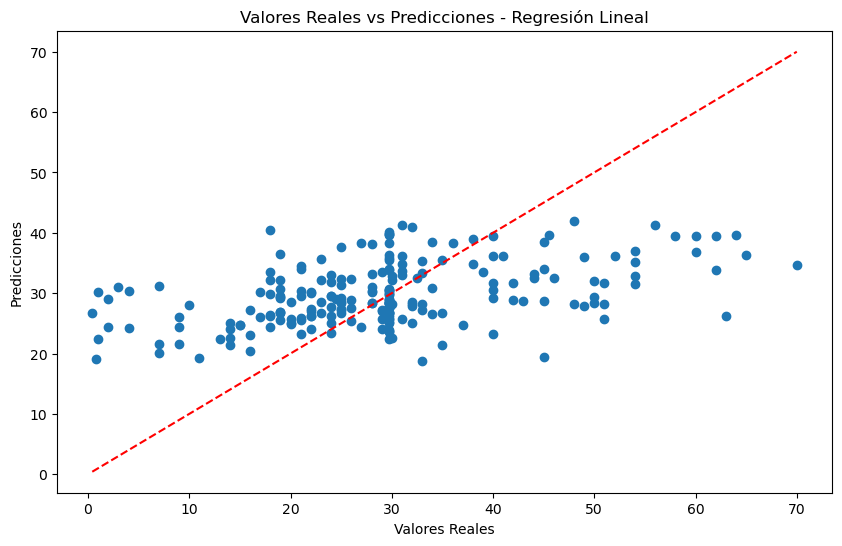

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones - Regresión Lineal')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')  # Línea de referencia
plt.show()

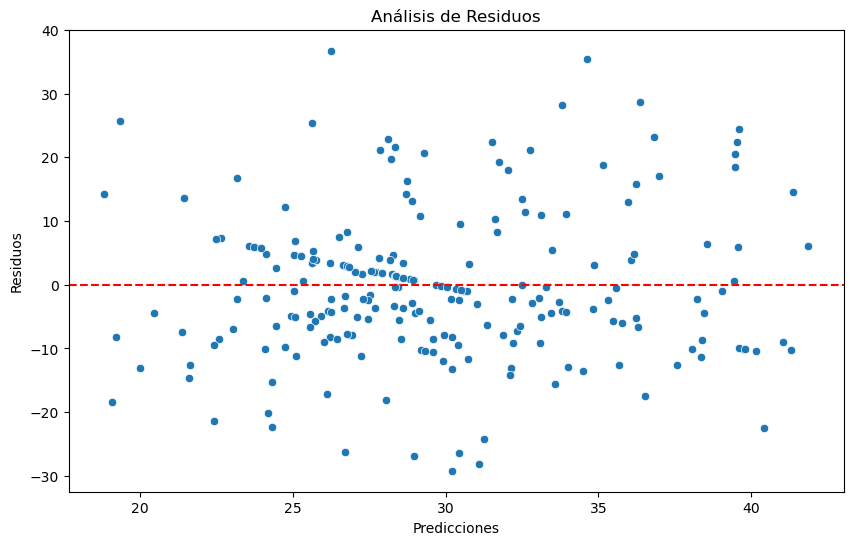

In [54]:
# Gráfico de residuos
residuals = Y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Análisis de Residuos')
plt.show()